Simulation of the 2D Ising model
--------------------------------

One of the most interesting phenomena in nature is ferromagnetism (FM). A FM
material exhibits a non-zero spontaneous magnetization in the absence of
an applied magnetic field. This occurs below a well-defined critical
temperature $T_c$ known as the Curie temperature. For $T > T_c$ the
magnetization vanishes. Hence $T_c$ separates two phases, a disordered
one for $T>T_c$, and a ferromagnetic one for $T<T_c$.

Although the Ising model is too simple, it already contains much of the
physics of the FM phase transition. In order to explore the properties
of this model, we need to calculate some physical quantities of
interest, including the mean energy $\langle E \rangle$, the mean
magnetization $\langle M \rangle$, the heat capacity $C$, and the
magnetic susceptibility $\chi$.

The Ising model
---------------

Consider a lattice with $N$ sites, where each site $i$ can assume two
possible states $s_i=+1,-1$, or spin “up” and spin “down”. A particular
configuration or microstate of the lattice is specified by the set of
variables $\{s_1,s_2,...s_N\}$ for all lattice sites.

Now we need to know the dependence of the energy $E$ of a given
microstate, according to the configuration of spins. The total energy in
the presence of a uniform magnetic field is given by the “Ising model”:
$$E=-J\sum_{\langle ij \rangle}s_is_j-h\sum_{i=1}^Ns_i,
$$ where the first summation is over all nearest neighbor
pairs and the second summation is over all the spins of the lattice. The
“exchange constant” $J$ is a measure of the strength of the interaction
between nearest neighbor spins. If $J>0$, the states with the spins
aligned $\uparrow \uparrow$ and $\downarrow \downarrow$ are
energetically favored, while for $J<0$ the configurations with the spins
antiparallel $\uparrow \downarrow$ and $\downarrow \uparrow$ are the ones
that are preferred. In the first case, we expect that the state with
lower energy is “ferromagnetic”, while in the second case, we expect it
to be “antiferromagnetic”. If we subject the system to a uniform
magnetic field $h$ directed upward, the spins $\uparrow$ and
$\downarrow$ possess and additional energy $-h$ and $+h$ respectively.
Note that we chose the units of $h$ such that the magnetic moment per
spin is unity.

Instead of obeying Newton’s laws, the dynamics of the Ising model
corresponds to “spin flip” processes: a spin is chosen randomly, and the
trial change corresponds to a flip of the spin $\uparrow \rightarrow
\downarrow$ or $\downarrow \rightarrow \uparrow$.


### Physical quantities

The net magnetic moment or "magnetization" $M$ is given by
$$M=\sum_{i=1}^N s_i.
$$ Usually we are interested in the average
$\langle M \rangle$ and the fluctuations
$\langle M^2 \rangle - \langle M \rangle ^2$ as a function of the
temperature of the system and the applied magnetic field. 
Notice that in the absence of a magnetic field, the value of $M$ should average zero.
This is because the system is as likely to be found with all the spins pointing up or down.
Therefore, one typically measures $m=\sqrt{M^2}$ or $m=|M|$, which is always a positive quantity.

### The heat capacity

One way to measure the heat capacity at constant external field id from
the definition: $$C=\frac{\partial \langle E \rangle}{\partial T}.$$
Another way is to use the statistical fluctuations for the total energy
in the canonical ensemble:
$$C=\frac{1}{(k_BT)^2}\left( \langle E^2 \rangle - \langle E \rangle ^2
\right).$$

### The magnetic susceptibility

The magnetic susceptibility $\chi$ is an example of a “response function
”, since it measures the ability of a spin to “respond” or flip with a
change in the external magnetic field. The zero isothermal magnetic
susceptibility is defined by the thermodynamic derivative
$$\chi=\lim _{H \rightarrow 0} \frac{\partial \langle M \rangle}{\partial H}.$$
The zero field susceptibility can be related to the magnetization
fluctuations in the system:
$$\chi=\frac{1}{k_BT} \left( \langle M^2 \rangle - \langle M \rangle ^2
\right),$$ where $\langle M^2 \rangle$ and $\langle M \rangle ^2$ are
zero field values.

Metropolis algorithm
--------------------

### Moves

One typically picks a random spin and it is flipped or not by calculating the energy difference between the considered spin and its 4 nearest neighbors using the formula:

 $$U = J  spin(x,y)  [spin(x+1,y)   + spin(x-1,y)    + spin(x,y+1)+ spin(x,y-1)]$$

The energy change is $\Delta U = 2U$.
The spin then directly flips if $\Delta U \le 0$. Otherwise, it only flips if a randomly chosen number between 0 or 1 is smaller than the Boltzmann factor $\exp(-kT\Delta U)$. 

Notice that the sum in brackets can run from -4 to +4, so we can easily store the values for all the possible configurations in lookup tables.

### Boundary conditions

Since we are interested in the properties of an infinite system, we have
to consider the boundary conditions. The simplest case corresponds to
“free boundary condition”. In a 1D chain, the spins at sites $1$ and $N$ are open
ends and have one interaction each. In general a better choice is
periodic boundary conditions (PBC), where sites 1 and $N$ interact with each
other closing a loop. In this situation, the chain has the topology of a
ring, and all the spins have the same number of interactions. We also
say that there is translational invariance, since the origin can be
picked arbitrarily.

The use of PBC minimizes the finite size effects.
However, a disadvantage is that they reduce the minimum separation
between two spins to half the length of the system. In a 2D system we need to
account for the periodicity on both the $x$ and $y$ directions, and our
system will have the topology of a torus.

### Initial conditions and equilibration

We can pick a random initial configuration. However, as we shall see, in
some simulations the equilibration process can account for a substantial
fraction of the total computer time. The most practical choice of an
initial condition is an “equilibrium” configuration of a previous run
which is at a temperature close to the desired temperature.

### Tricks

It is convenient that we store all the transition probabilities in
lookup tables, so we do not have to calculate them at each step. Another
trick consists of storing all the positions of the spins and their
neighbors to avoid calculating many random numbers. If you need to
perform several runs for different values of the temperature $T$, you
can do it at the same time using the same random numbers.

### Exercise 2: Equilibration of the 2D Ising model 

1.  Run your simulation with $L=8$ and $T=2$ and choose the initial
    spins to be all up. Plot the variation of the energy and the
    magnetization with time. How much time is necessary for the system
    to reach equilibrium?

2.  Visually inspect several “equilibrium” configurations. Is the system
    ordered or disordered?

3.  Run the program with $T=1.5$ and chose the same initial
    configuration with all the spins up. How long does it take for the
    system to reach equilibrium?

4.  Visually inspect several equilibrium configurations with $T=1.5$.
    Are they more or less ordered than those in part 2?

5.  Is the acceptance ratio and increasing or decreasing function of
    $T$? Does the Metropolis algorithm become more or less efficient at
    low temperatures?



In [26]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

class BoundaryCondition:
    RBC, PBC = range(2)
    
class Direction:
    RIGHT, TOP, LEFT, BOTTOM = range(4)
    
class Ising(object):
    
    def __init__ (self, L, J, T):
      
        self.L = L
        self.N = L*L
        self.TWOJ = 2.*J
        self.T = T
        self.beta = 1./T
        
        # Initialize site positions
        # Initialize neighbors table for boundary conditions
        self.nn = np.zeros(shape=(self.N,4), dtype=np.int16)
        self.position = np.zeros(shape=(L,L), dtype=np.int16)
        self.x = np.zeros(self.N, dtype=np.int16)
        self.y = np.zeros(self.N, dtype=np.int16)

        # Periodic boundary conditions
        n = 0
        for iy in range(L):
            for ix in range(L):
                self.position[iy,ix] = n
                self.x[n] = ix
                self.y[n] = iy
                self.nn[n,Direction.LEFT] = n-1
                self.nn[n,Direction.RIGHT] = n+1
                self.nn[n,Direction.TOP] = n+L
                self.nn[n,Direction.BOTTOM] = n-L
                if(ix == 0):
                    self.nn[n,Direction.LEFT] = n+L-1
                if(ix == L-1):
                    self.nn[n,Direction.RIGHT] = n-(L-1)
                if(iy == 0):
                    self.nn[n, Direction.BOTTOM] = n+(L-1)*L
                if(iy == L-1):
                    self.nn[n, Direction.TOP] = n-(L-1)*L
                n += 1

        # Initialize spins
        r = np.random.random(self.N)*2-1
        self.spin = np.ones(self.N, dtype=np.int16)
        for i in range(self.N):
            if(r[i] < 0):
                self.spin[i] *= -1
                
        self.Mtot = np.sum(self.spin)
        self.E = 0.
        for i in range(self.N):
            self.E += -J*self.spin[i]*(self.spin[self.nn[i,Direction.RIGHT]]+self.spin[self.nn[i,Direction.TOP]])

        # Transition probabilities
        self.de = np.zeros(shape=(3,9))
        self.w = np.zeros(shape=(3,9))
        self.set_temp(self.T)
                                                             
    def set_temp(self, T):
        self.T = T
        self.beta = 1./T
        # Lookup tables for transition probabilities
        for i in range(-4,5):
            self.de[0,i+4] = -self.TWOJ*i
            self.de[2,i+4] = self.TWOJ*i
            p = np.exp(-self.beta*self.de[0,i+4])
            self.w[0,i+4] = min(p, 1.)
            self.w[2,i+4] = min(1./p,1.)
                                                             
    def metropolis(self):
        nchanges = 0
        for n in range(self.N):
            # trial spin change
            # pick a random particle
            i = int(np.random.random()*self.N)

            # change in energy
            iright = self.nn[i, Direction.LEFT]
            ileft = self.nn[i, Direction.RIGHT]
            itop = self.nn[i, Direction.TOP]
            ibottom = self.nn[i, Direction.BOTTOM]

            spin_sum = self.spin[ileft] + self.spin[iright] + self.spin[itop] + self.spin[ibottom]

            s = self.spin[i]
            deltaE = self.de[s+1,spin_sum+4]

            if(deltaE <= 0. or np.random.random() < self.w[s+1,spin_sum+4]):
                self.spin[i] *= -1
                self.Mtot += 2*(-s)
                self.E += deltaE
                nchanges += 1
        return nchanges
        


T =  2.5
<E>/N =  -1.2036399999999998
<E^2>/N =  1.5208144000000001
<M>/N =  0.55364
<M^2>/N =  0.3734984
C= 0.01153042406400008
chi= 0.026792460159999986
Acceptance ratio =  0.2861166666666667


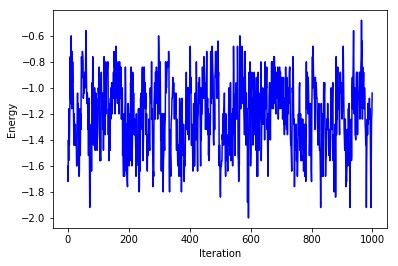

In [29]:
L=10
Nwarmup = 100
Nsteps = 1000
Ndecorr = 3
Temp = 2.5
J = 1.

S = Ising(L, J, Temp)
E = np.zeros(Nsteps)
M = np.zeros(Nsteps)

for i in range(Nwarmup):
    S.metropolis()

naccept = 0
for i in range(Nsteps):
    for n in range(Ndecorr):
        naccept += S.metropolis()
    E[i] = S.E
    M[i] = abs(S.Mtot)

E /= S.N
M /= S.N


Et = np.sum(E)/Nsteps
E2t = np.sum(E**2)/Nsteps
Mt = np.sum(M)/Nsteps
M2t = np.sum(M**2)/Nsteps

print("T = ", Temp)
print("<E>/N = ", Et)
print("<E^2>/N = ", E2t)
print("<M>/N = ", Mt)
print("<M^2>/N = ", M2t)
print("C=", (E2t-Et*Et)/Temp/Temp)
print("chi=", (M2t-Mt*Mt)/Temp)
print("Acceptance ratio = ", float(naccept)/S.N/Nsteps/Ndecorr)
        
pyplot.plot(np.arange(0,Nsteps,1),E,ls='-',c='blue');
pyplot.xlabel("Iteration")
pyplot.ylabel("Energy");

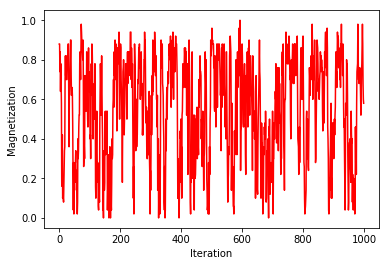

In [30]:
pyplot.plot(np.arange(0,Nsteps,1),M,ls='-',c='red');
pyplot.xlabel("Iteration")
pyplot.ylabel("Magnetization");

In [31]:
T = np.arange(0.2,6,0.2)

Mt = np.zeros(T.size)
Et = np.zeros(T.size)
M2t = np.zeros(T.size)
E2t = np.zeros(T.size)

S = Ising(L, J, 0.2)

Nsteps = 1000

n = 0
for t in T:
    S.set_temp(t)
    for i in range(Nwarmup):
        S.metropolis()

    for i in range(Nsteps):
        for j in range(Ndecorr):
            S.metropolis()
        Et[n] += S.E
        Mt[n] += abs(S.Mtot)
        E2t[n] += S.E**2
        M2t[n] += abs(S.Mtot)**2


    n += 1

Mt /= float(Nsteps*S.N)
Et /= float(Nsteps*S.N)
E2t /= float(Nsteps*S.N*S.N)
M2t /= float(Nsteps*S.N*S.N)
ErrorE = np.sqrt((E2t-Et**2)/Nsteps)
ErrorM = np.sqrt((M2t-Mt**2)/Nsteps)

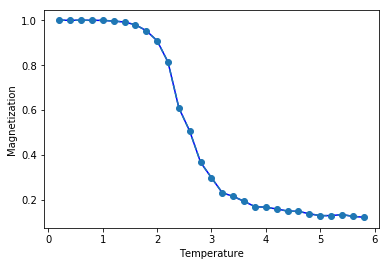

In [32]:
pyplot.plot(T,Mt,ls='-',c='blue')
pyplot.errorbar(T, Mt, yerr=[ErrorM, ErrorM], fmt='--o')
pyplot.ylabel("Magnetization")
pyplot.xlabel("Temperature");

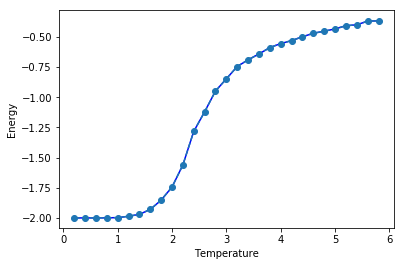

In [33]:
pyplot.plot(T,Et,ls='-',c='blue')
pyplot.errorbar(T, Et, yerr=[ErrorE, ErrorE], fmt='--o')
pyplot.ylabel("Energy")
pyplot.xlabel("Temperature");

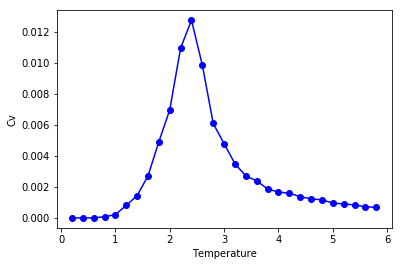

In [34]:
pyplot.plot(T,(E2t-Et**2)/T/T,marker='o',ls='-',c='blue');
pyplot.ylabel("Cv")
pyplot.xlabel("Temperature");

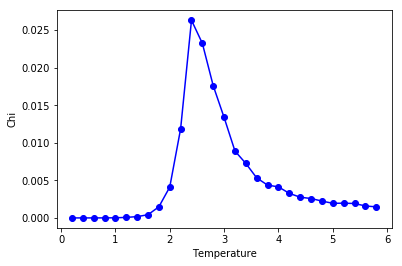

In [35]:
pyplot.plot(T,(M2t-Mt**2)/T,marker='o',ls='-',c='blue');
pyplot.ylabel("Chi")
pyplot.xlabel("Temperature");

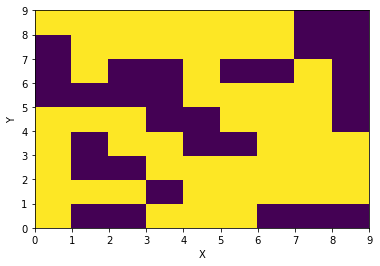

In [21]:
x, y = np.meshgrid(np.arange(0,L,1),np.arange(0,L,1))
s = S.spin.reshape(L,L)
pyplot.pcolormesh(x,y,s)
pyplot.ylabel("Y")
pyplot.xlabel("X");


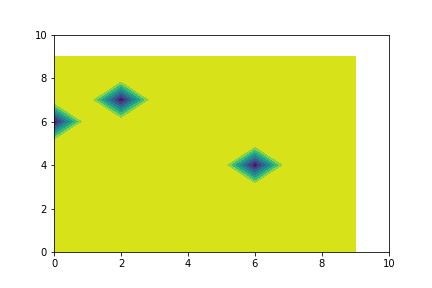
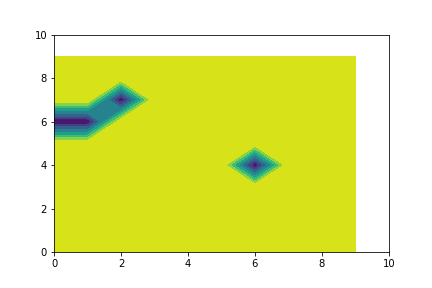
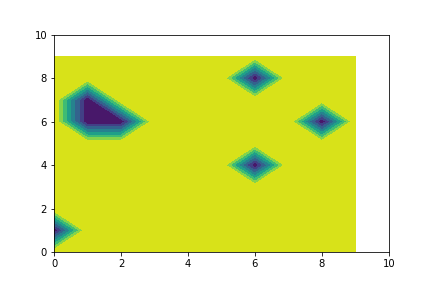
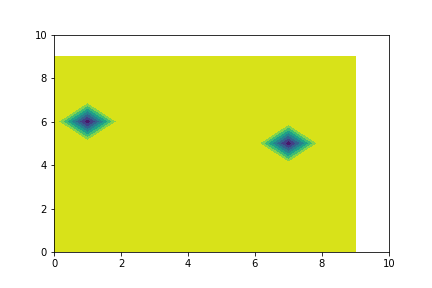
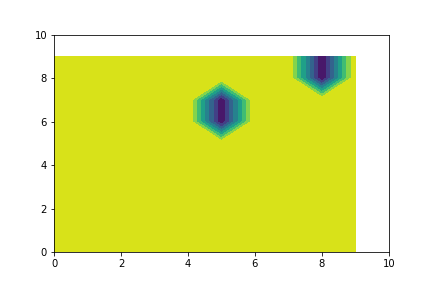
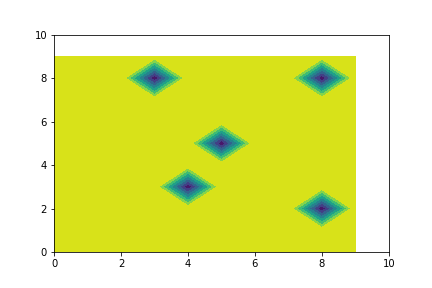
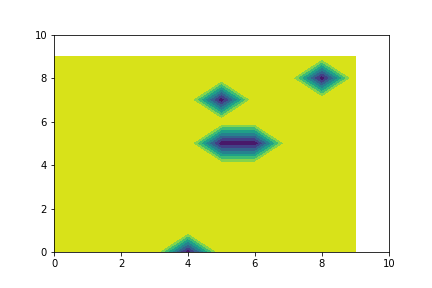
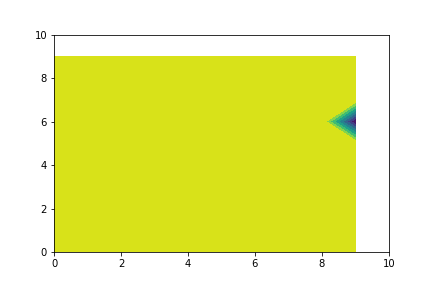
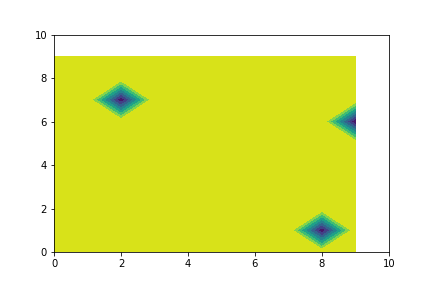
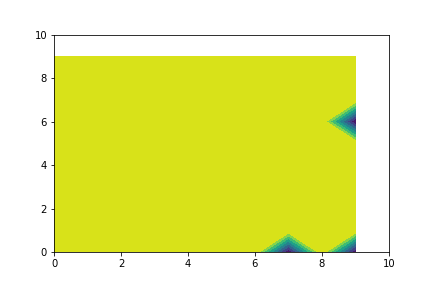
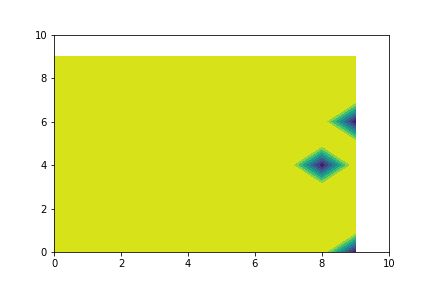
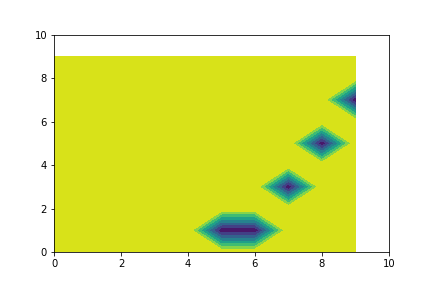
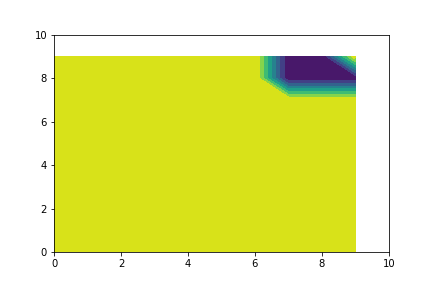
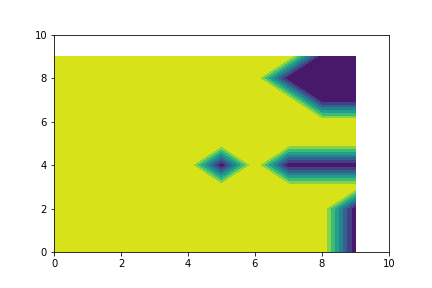
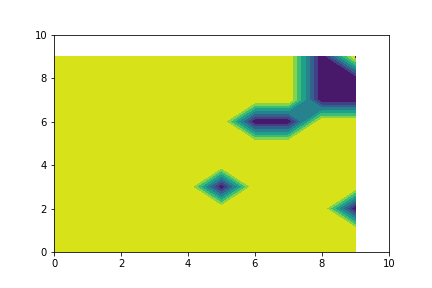
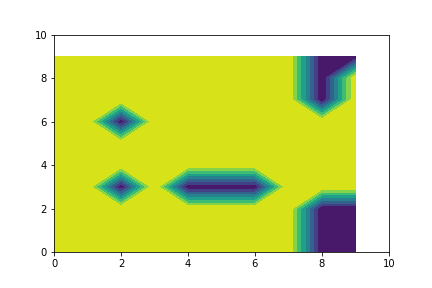
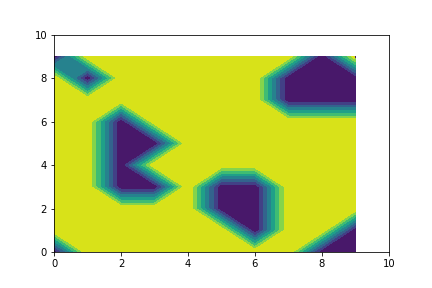
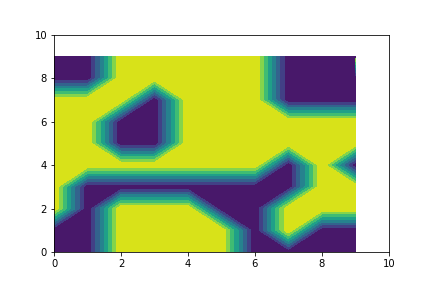
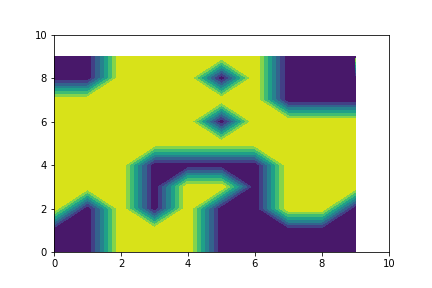
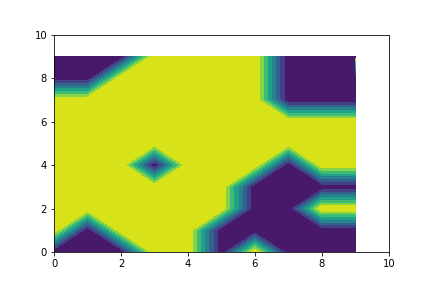
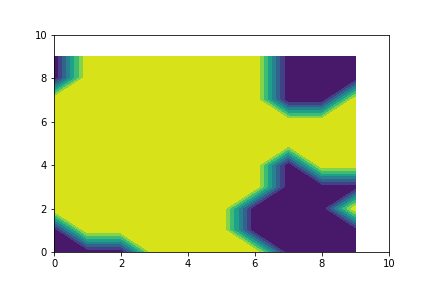
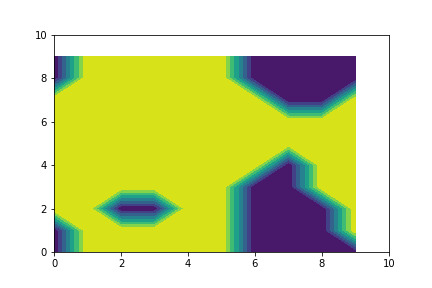
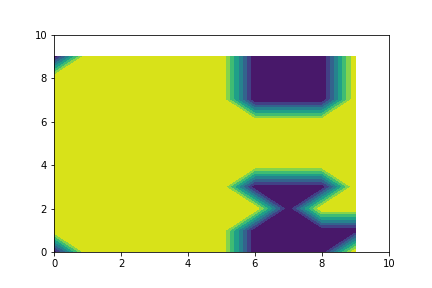
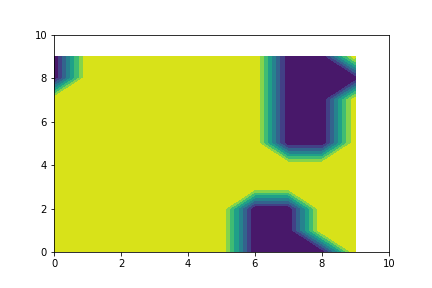
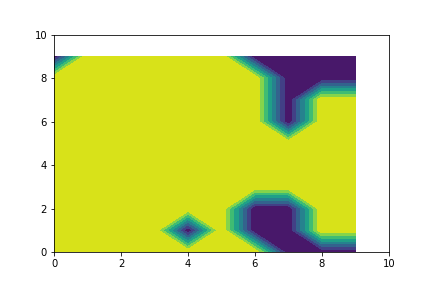
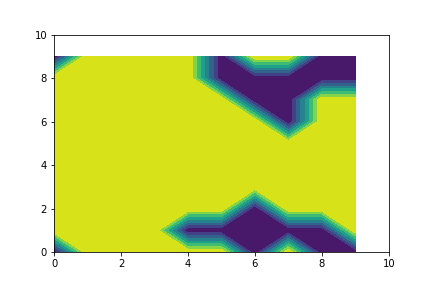
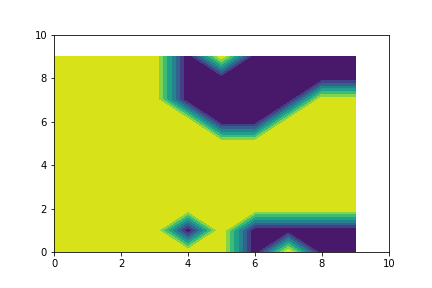
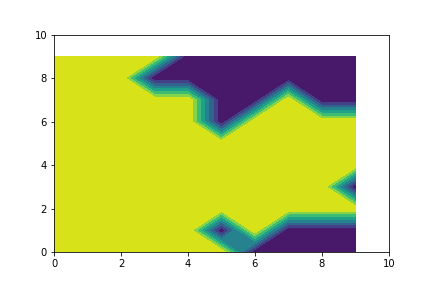
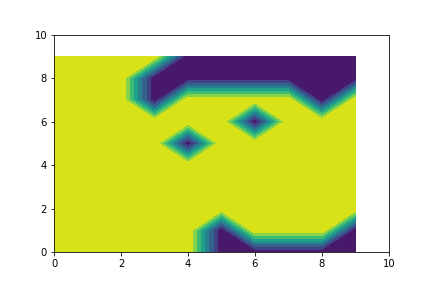
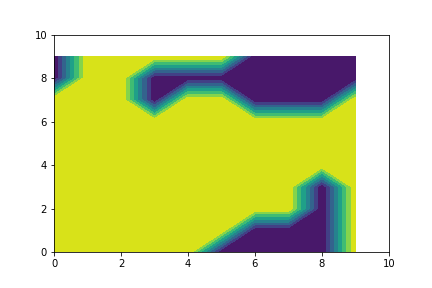

In [22]:
# Animation

S.set_temp(2.27)
S.spin.fill(1)

fig, ax = pyplot.subplots()
ax = pyplot.axes(xlim=(0, L), ylim=(0, L))
Sdata = S.spin.reshape(L,L)
cont = ax.contourf(x,y,Sdata)

def evolve(i):
    global x, y, S
    S.metropolis()
    Sdata = S.spin.reshape(L,L)
    cont = ax.contourf(x,y,Sdata)
    return cont,

anim = animation.FuncAnimation(fig, evolve, frames = 30, interval=100, blit = False)

display_animation(anim, default_mode='once')



In [26]:
L

10